In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcardfraud/creditcard.csv


### Dependency Import

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Dataset Exploring

In [7]:
path = '/kaggle/input/creditcardfraud/creditcard.csv'
data = pd.read_csv(path)

In [8]:
print('The dataset contains {} columns and {} rows'.format(data.shape[1], data.shape[0]))

The dataset contains 31 columns and 284807 rows


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
74318,55515.0,1.195904,0.080620,0.109113,0.265523,-0.391748,-1.048522,0.207354,-0.178552,-0.232934,...,0.008999,-0.042696,-0.055128,0.579203,0.445505,0.569204,-0.079369,-0.002776,27.83,0
203464,134832.0,2.000764,-0.340860,-1.103463,0.710945,-0.292293,-0.873364,-0.024912,-0.209237,1.032595,...,0.060441,0.378181,0.029671,-0.070620,0.104487,0.464799,-0.058726,-0.064287,28.19,0
112943,72864.0,-0.739988,0.963159,-0.407214,-1.154418,2.160597,3.296827,-0.243859,1.365567,-0.689039,...,-0.231775,-0.919628,0.011223,0.982186,-0.009714,0.088165,0.140994,0.043986,8.99,0
185745,126805.0,2.039050,-0.103903,-2.609943,-0.087207,1.082524,-0.524047,0.663892,-0.247082,0.219456,...,0.189852,0.493924,-0.172250,-0.115524,0.613687,-0.416484,-0.057930,-0.075564,50.00,0
41783,40823.0,1.019602,-0.769519,1.002009,0.343649,-1.418973,-0.383515,-0.614759,0.106908,1.402571,...,-0.189877,-0.577619,0.010054,0.439701,0.053416,0.936209,-0.061401,0.028661,107.29,0


### Distribution of Time and Amount

[Text(0.5, 1.0, 'Distribution of time')]

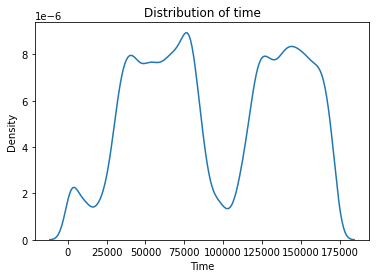

In [11]:
sns.kdeplot(data['Time']).set(title='Distribution of time')

[Text(0.5, 1.0, 'Distribution of amount')]

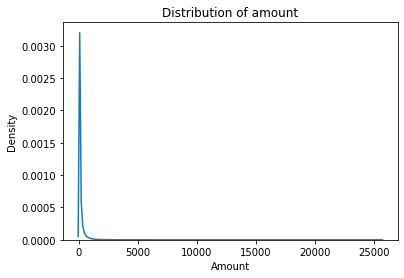

In [12]:
sns.kdeplot(data['Amount']).set(title='Distribution of amount')

### Classification of Normal and Fraudulent Transactions

In [13]:
counts = data.Class.value_counts()
normal = data[data.Class == 0]
fraudulent = data[data.Class == 1]

In [14]:
perc_normal = (counts[0]/(counts[0] + counts[1]))*100
perc_fraudulent = (counts[1]/(counts[0] + counts[1]))*100

print('The {:.2f}% of transactions were normal and {:.2f}% were fraudulent'.format(perc_normal, perc_fraudulent))

The 99.83% of transactions were normal and 0.17% were fraudulent


[Text(0.5, 1.0, 'Normal vs. Fraudulent transactions'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Class(0:Normal, 1:Fraudulent)')]

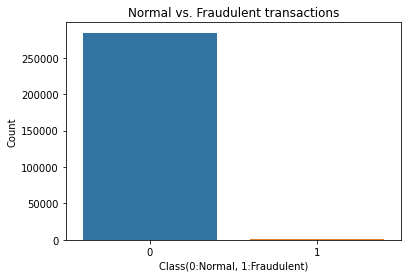

In [15]:
sns.barplot(x=counts.index, y=counts).set(title='Normal vs. Fraudulent transactions', ylabel='Count', xlabel='Class(0:Normal, 1:Fraudulent)')

## Data Modeling

In [37]:
normal_sample = normal.sample(n=counts[1])
modif_data = pd.concat([normal_sample, fraudulent], axis=0)
modif_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [38]:
X = modif_data.drop(columns='Class', axis=1)
y = modif_data['Class']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=8)

### Training and testing

In [51]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [56]:
X_test_pred = lr.predict(X_test)
acc_regres = round(accuracy_score(X_test_pred, y_test) * 100, 2)
print('Logistic Regression Accuracy: ', acc_regres)

Logistic Regression Accuracy:  95.43
